In [1]:
import numpy as np
import pandas as pd
from skimage import io, feature, color, data
import matplotlib.pyplot as plt 
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import time
from keras.preprocessing import image
from sklearn.metrics import accuracy_score


In [2]:
train_img_path = './data/seg_train/seg_train/'
test_img_path = './data/seg_test/seg_test/'

X_train = []
y_train = []

X_test = []
y_test = []

labels=['Buildings','Forest', 'Glacier','Mountain','Sea','Street']


In [3]:
#Extracts Histogram of Oriented Gradients of one image used for classification later
def get_preprocessed(jpeg_path):
    jpg = cv2.imread(jpeg_path)
    jpg = cv2.resize(jpg,(150,150))
    hog = feature.hog(jpg)/255.0
    return hog

In [4]:
#Fetches all images from the specified folder and gets hog for each file aswell as saves the labels in different array
#Works with both train and test data
def jpeg_to_array (scene_type, img_root_path, data_type):
    scene_path = os.path.join(img_root_path,scene_type.lower())
    print('Loading ' + data_type +' images for '+scene_type)
    #Iteraters the content of a folder
    for img in os.listdir(scene_path):
        img_path = os.path.join(scene_path,img)
        #Check if path is an image
        if img_path.endswith('.jpg'):
            #Check if it is training or testing data and puts it in the right array
            if(data_type == 'Training'):
                X_train.append(get_preprocessed(img_path))
                y_train.append(labels.index(str(scene_type)))
            if(data_type =='Testing'):
                X_test.append(get_preprocessed(img_path))
                y_test.append(labels.index(str(scene_type)))


In [5]:
#Iterates all the labels for training folder
[jpeg_to_array(scene,train_img_path,'Training')for scene in labels]

Loading Training images for Buildings
Loading Training images for Forest
Loading Training images for Glacier
Loading Training images for Mountain
Loading Training images for Sea
Loading Training images for Street


[None, None, None, None, None, None]

In [6]:
#Iterates all the labels for testing folder
[jpeg_to_array(scene,test_img_path,'Testing')for scene in labels]

Loading Testing images for Buildings
Loading Testing images for Forest
Loading Testing images for Glacier
Loading Testing images for Mountain
Loading Testing images for Sea
Loading Testing images for Street


[None, None, None, None, None, None]

In [26]:
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=4, p=1)
neigh.fit(X_train, y_train)
fit_time = time.time()-start_time
pred = neigh.predict(X_test)
pred_time = time.time()-start_time-fit_time

In [31]:
print('Training time = ' + str(fit_time) + ' seconds')
print('Prediction time = ' + str(pred_time) +  ' seconds')

Training time = 70.61186790466309 seconds
Prediction time = 1120.0653500556946 seconds


In [45]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[229 106  16  24  53   9]
 [  2 464   0   4   4   0]
 [  4  62 144 116 227   0]
 [  0  25  32 228 240   0]
 [  3  15   3  36 451   2]
 [ 45 267  16  14  43 116]]
0.544


In [35]:
print('Size of the training data was ' + str(len(X_train)))
print('Size of the testing data was ' + str(len(X_test)))

Size of the training data was 14034
Size of the testing data was 3000


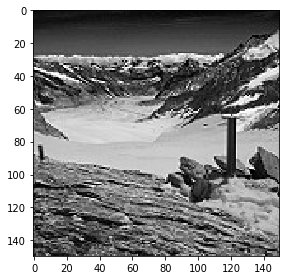

In [48]:
example_image = cv2.imread('./data/seg_pred/seg_pred/11.jpg')
io.imshow(example_image)

In [49]:
hog_example = feature.hog(example_image)
start_prediction = time.time()
neigh.predict([hog_example])
finish_prediction = time.time() - start_prediction

In [51]:
print('Time for prediction 1 image: ' + str(finish_prediction) + ' seconds')

Time for prediction 1 image: 0.6382708549499512 seconds
